In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [142]:
import pandas as pd
b = pd.read_csv("b_features_2.csv")
print(b.size)
#lx = lx[(lx["eta_error_s"] <= 1000) | (lx["pred_eta_s"] <= 60)]
#lx = lx[lx["eta_error_s"] <= 1100]
print(b.size)

6346605
6346605


In [143]:
y = b["eta_error_s"].dropna()

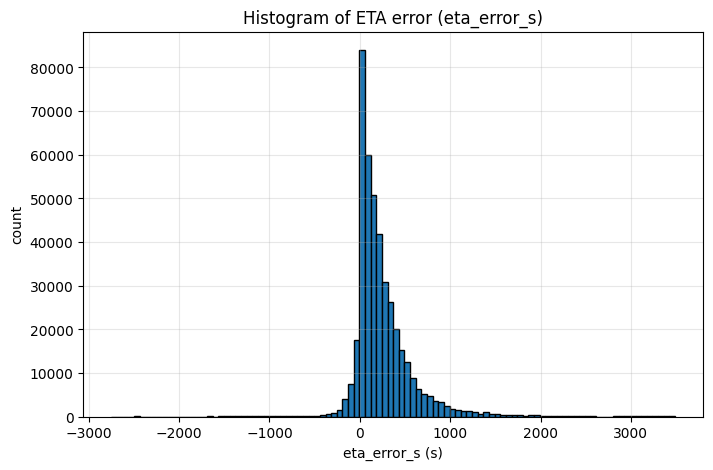

In [144]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(y, bins=100, color="C0", edgecolor="black")
plt.xlabel("eta_error_s (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error (eta_error_s)")
plt.grid(alpha=0.3)
plt.show()

In [145]:
def series_without_outliers(series, k=1.5):
    s = series.dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    low, high = q1 - k * iqr, q3 + k * iqr
    return series.between(low, high) | series.isna()
clean = b.copy()
eta_error_no_outliers = series_without_outliers(clean["eta_error_s"], k=1.5)
speed_no_outliers = series_without_outliers(clean["speed_prev_mps"], k=1.5)
clean = clean[eta_error_no_outliers & speed_no_outliers].reset_index(drop=True)

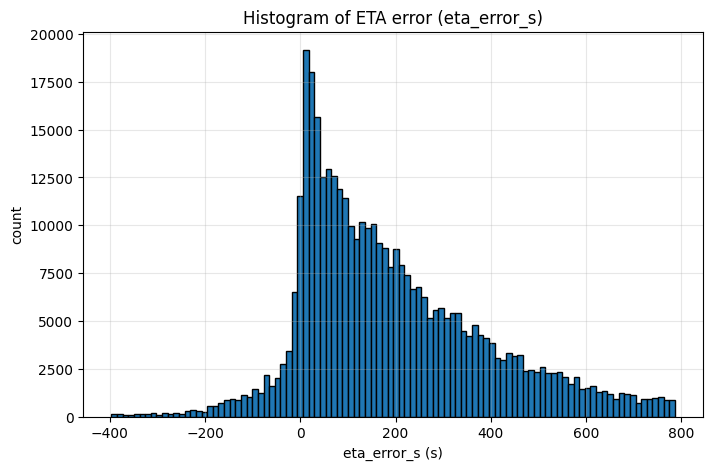

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(clean["eta_error_s"], bins=100, color="C0", edgecolor="black")
plt.xlabel("eta_error_s (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error (eta_error_s)")
plt.grid(alpha=0.3)
plt.show()

In [147]:
b_sample = clean.sample(n=10000, random_state=42)
y_sample = b_sample["eta_error_s"].dropna()

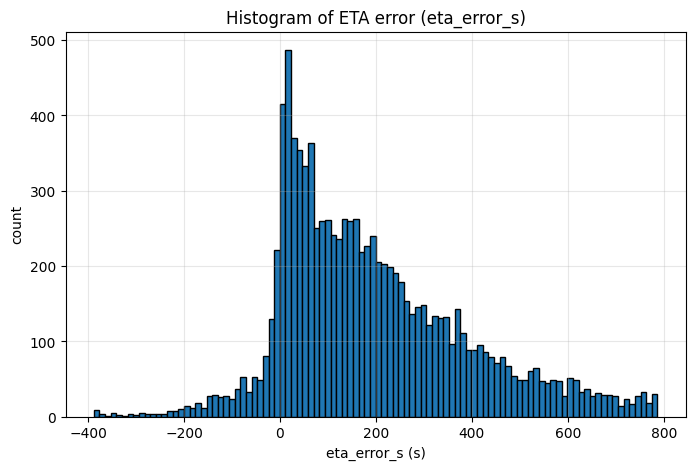

In [148]:
plt.figure(figsize=(8,5))
plt.hist(y_sample, bins=100, color="C0", edgecolor="black")
plt.xlabel("eta_error_s (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error (eta_error_s)")
plt.grid(alpha=0.3)
plt.show()

In [149]:
paired = b_sample[["pred_eta_s", "eta_error_s"]].dropna()
x_sample = paired["pred_eta_s"]
y_sample = paired["eta_error_s"]

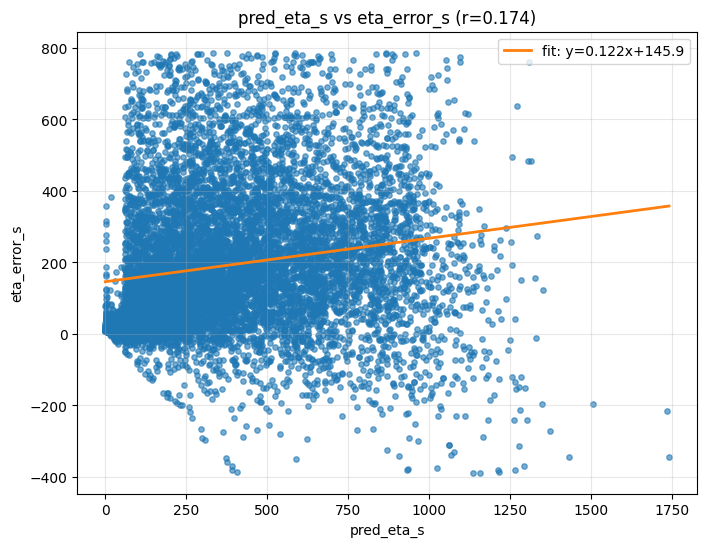

In [ ]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
if x.size > 1:
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
        plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("pred_eta_s")
plt.ylabel("eta_error_s")
plt.title(f"pred_eta_s vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [151]:
paired = b_sample[["pax_load", "eta_error_s"]].dropna()
x_sample = paired["pax_load"]
y_sample = paired["eta_error_s"]

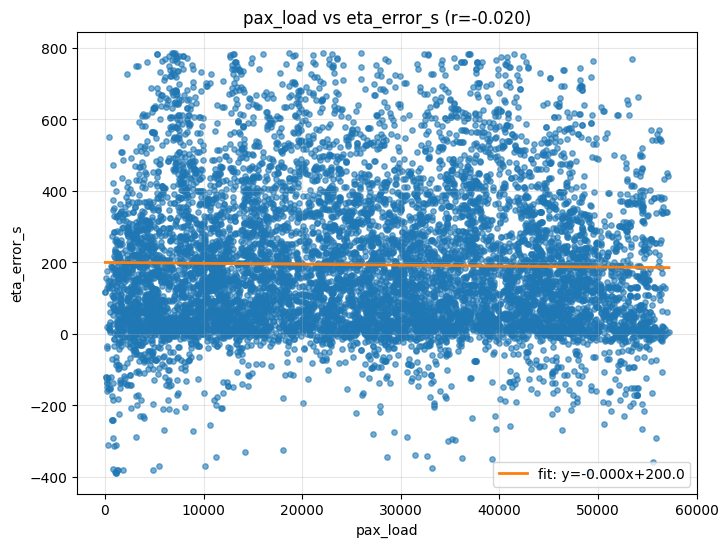

In [161]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
mask = np.isfinite(x) & np.isfinite(y)
if mask.sum() > 1:
    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)
    xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
    plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("pax_load")
plt.ylabel("eta_error_s")
plt.title(f"pax_load vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [153]:
paired = b_sample[["speed_prev_mps", "eta_error_s"]].dropna()
#paired = paired[paired["speed_prev_mps"] < 40]
x_sample = paired["speed_prev_mps"]
y_sample = paired["eta_error_s"]

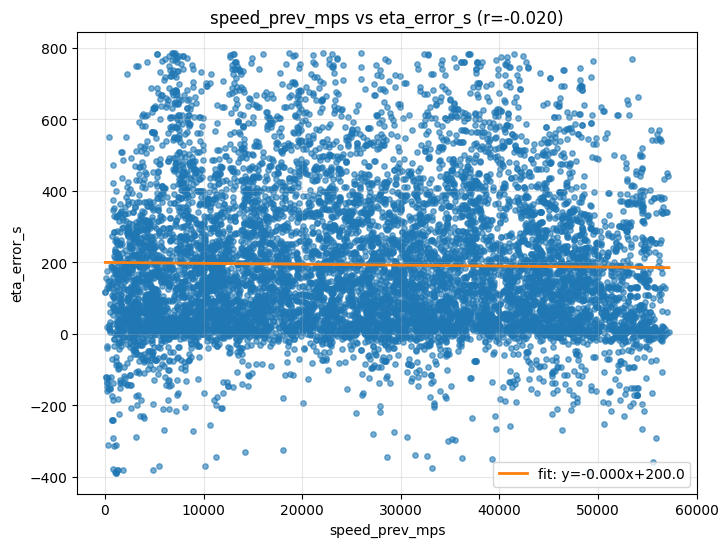

In [163]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
mask = np.isfinite(x) & np.isfinite(y)
if mask.sum() > 1:
    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)
    xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
    plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("speed_prev_mps")
plt.ylabel("eta_error_s")
plt.title(f"speed_prev_mps vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [155]:
paired = b_sample[["speed_1min_mps", "eta_error_s"]].dropna()
paired = paired[paired["speed_1min_mps"] < 30]
x_sample = paired["speed_1min_mps"]
y_sample = paired["eta_error_s"]

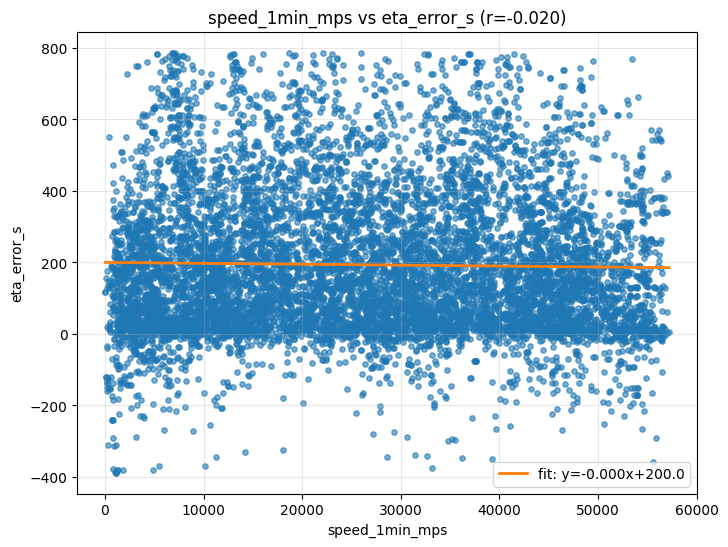

In [166]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
mask = np.isfinite(x) & np.isfinite(y)
if mask.sum() > 1:
    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)
    xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
    plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("speed_1min_mps")
plt.ylabel("eta_error_s")
plt.title(f"speed_1min_mps vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [160]:
paired = b_sample[["time_of_day_s", "eta_error_s"]].dropna()
x_sample = paired["time_of_day_s"]
x_sample = (x_sample + 86400 - 60*60*12) % (86400)
y_sample = paired["eta_error_s"]
print(x_sample.max(), x_sample.min())

57188 38


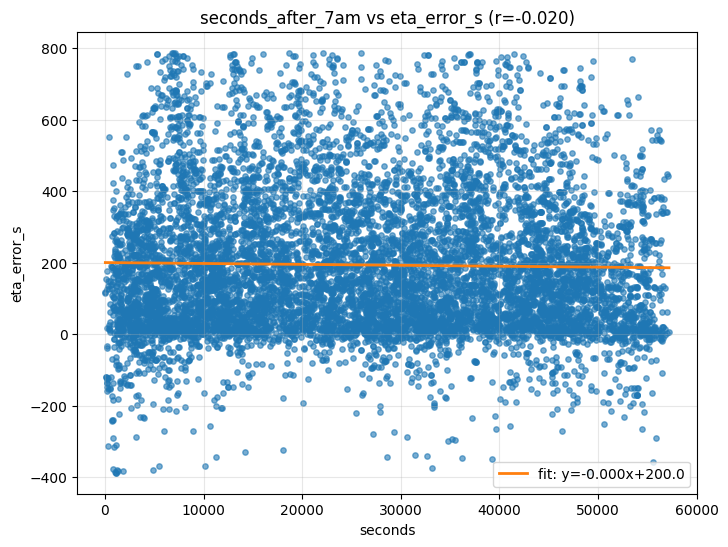

In [167]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
mask = np.isfinite(x) & np.isfinite(y)
if mask.sum() > 1:
    z = np.polyfit(x[mask], y[mask], 1)
    p = np.poly1d(z)
    xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
    plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("seconds")
plt.ylabel("eta_error_s")
plt.title(f"seconds_after_7am vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

/var/folders/j7/zg72qj2521b4v_sw10nk4ntm0000gn/T/ipykernel_14876/1432770615.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = paired.groupby("bin")["eta_error_s"].mean().astype(float)


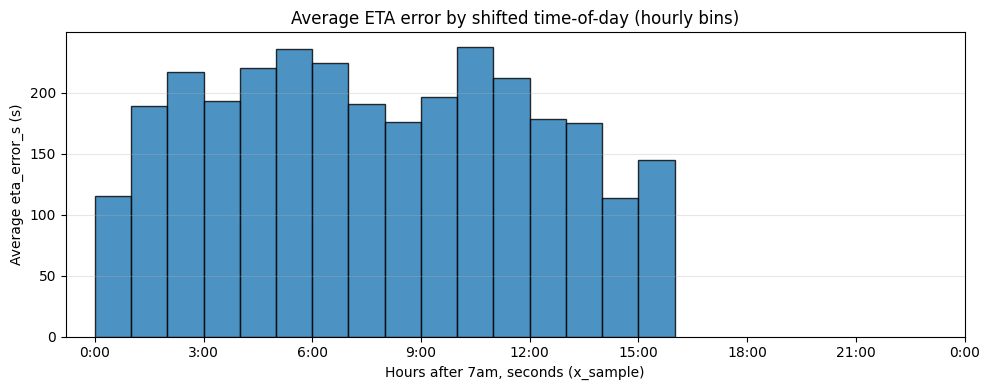

In [ ]:
bins = np.linspace(0, 86400, 25)
bin_centers = (bins[:-1] + bins[1:]) / 2.0
paired["bin"] = pd.cut(x_sample, bins=bins, labels=bin_centers, include_lowest=True, right=False)
agg = paired.groupby("bin")["eta_error_s"].mean().astype(float)
plt.figure(figsize=(10,4))
xs = agg.index.astype(float)          
width = bins[1] - bins[0]
plt.bar(xs, agg.values, width=width, align="center", color="C0", edgecolor="k", alpha=0.8)
plt.xlabel("Hours after 7am, seconds (x_sample)")
plt.ylabel("Average eta_error_s (s)")
plt.title("Average ETA error by shifted time-of-day")
tick_secs = np.arange(0, 86401, 3*3600)
plt.xticks(tick_secs, [f"{int(t/3600)%24}:00" for t in tick_secs])
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()